In [1]:
# https://stackoverflow.com/questions/30145957/plotting-2d-kernel-density-estimation-with-python

import numpy as np
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = np.array([
    (130,84,45),   # brown
    (214,7,36),    # red
    (37,131,135),   # turquois
    (244,202,203), # pink
]) / 255

In [6]:
LAB =   'clusters/imgs/y.npy'
EMB =   'clusters/mobilenet_1pct/tsne.npy'
PLAB =  'clusters/mobilenet_1pct/ypred.npy'
OUT_0 = 'clusters/mobilenet_1pct/kde_overlap.png'
OUT_1 = 'clusters/mobilenet_1pct/kde_single.png'

emb = np.load(EMB)
plab = np.load(PLAB)
lab = np.load(LAB)
print('emb', emb.shape)
print('plab', plab.shape)
print('lab', lab.shape)
print(np.unique(lab))
[print(np.sum(lab==c)) for c in np.unique(lab)]

# Normalize embedding space
emb[:,0] -= np.min(emb[:, 0])
emb[:,1] -= np.min(emb[:, 1])
emb[:,0] /= np.max(emb[:, 0])
emb[:,1] /= np.max(emb[:, 1])

# sample = np.random.choice(np.arange(len(lab)), 1000, replace=False)
# emb = emb[sample, :]
# lab = lab[sample]

emb (9602, 2)
plab (9602,)
lab (9602,)
[0 1 2 3]
763
2277
2704
3858


Class 3 3858 values
Class 2 2704 values
Class 1 2277 values
Class 0 763 values


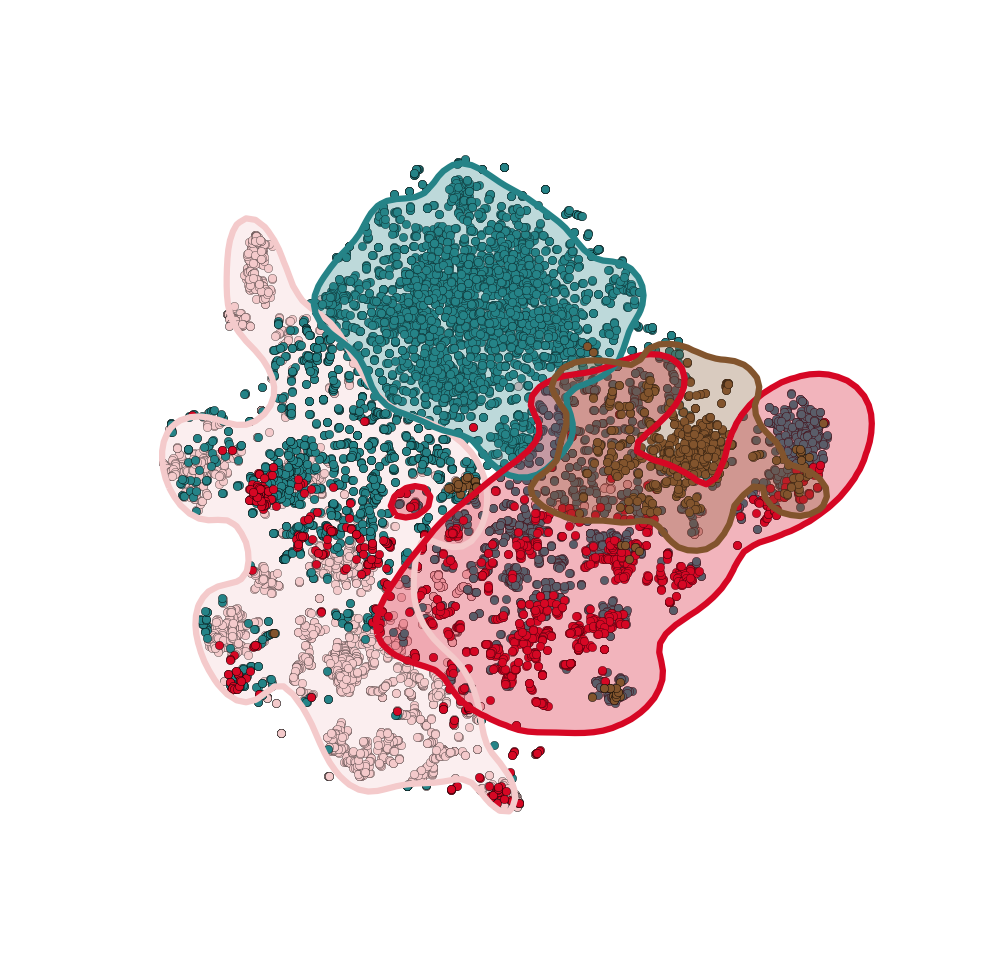

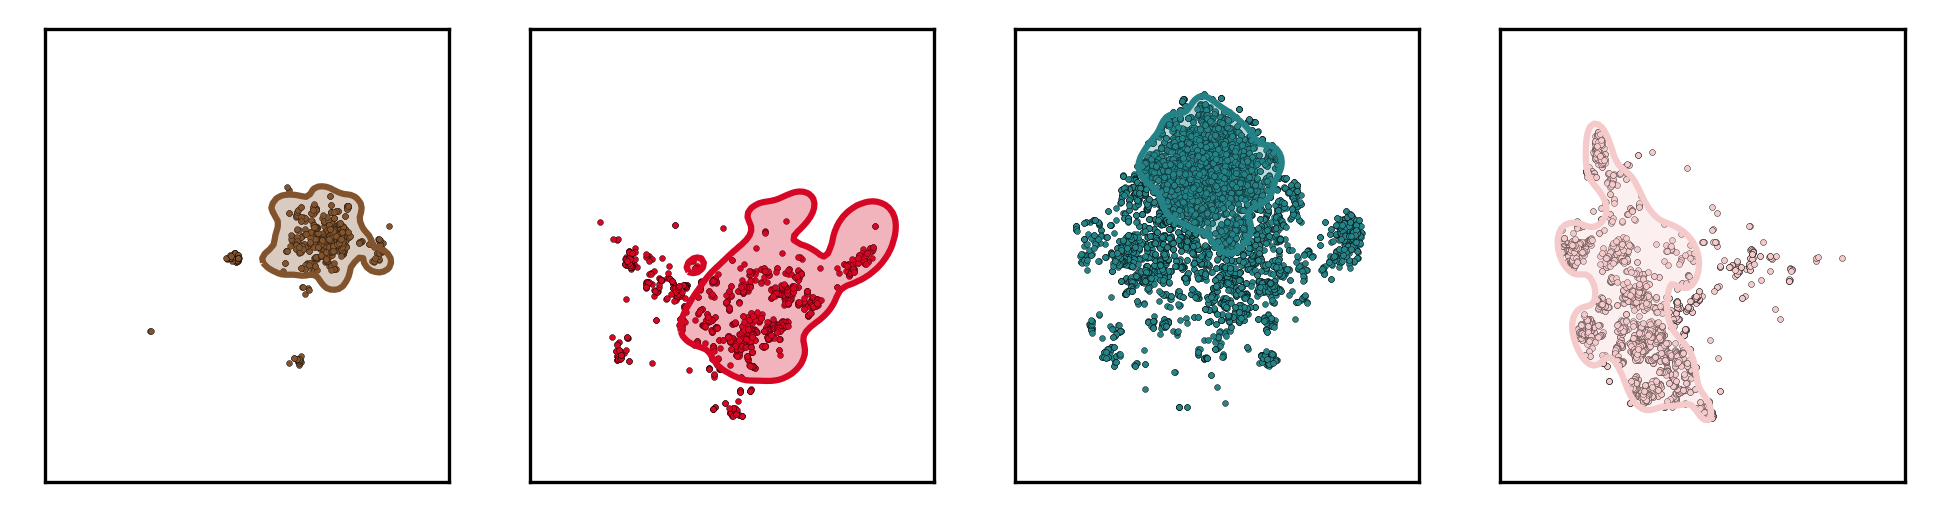

In [7]:
EPS = 1e-6

fig_0 = plt.figure(figsize=(4,4), dpi=300)
mainax = plt.gca()

xmin, xmax = np.min(emb[:,0])-0.2, np.max(emb[:,0])+0.2
ymin, ymax = np.min(emb[:,1])-0.2, np.max(emb[:,1])+0.2

fig_1, subaxs = plt.subplots(1, len(np.unique(lab)), figsize=(8,2), dpi=300)

for c in [3,2,1,0]:
    color = colors[c]
    cmap = ListedColormap(color)
    ix = lab == c
    print('Class {} {} values'.format(c, ix.sum()))
    
    x = emb[ix,0]
    y = emb[ix,1]
    
    ixp = plab == c
    xp = emb[ixp, 0]
    yp = emb[ixp, 1]

    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x,y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    
    topf = np.quantile(f[f > EPS], 0.80)
    
    mainax.scatter(xp, yp, c=np.expand_dims(color, 0), s=4, lw=0.1, edgecolors='k')
    mainax.contour(xx, yy, f, [topf], cmap=cmap)
    mainax.contourf(xx, yy, f, [topf, np.max(f)], alpha=0.3, cmap=cmap)
    
    subaxs[c].scatter(xp, yp, c=np.expand_dims(color, 0), s=2, lw=0.1, edgecolors='k')
    subaxs[c].contour(xx, yy, f, [topf], cmap=cmap)
    subaxs[c].contourf(xx, yy, f, [topf, np.max(f)], alpha=0.3, cmap=cmap)
    subaxs[c].set_xticks([])
    subaxs[c].set_yticks([])

mainax.set_axis_off()

fig_0.savefig(OUT_0, bbox_inches='tight')
fig_1.savefig(OUT_1, bbox_inches='tight')